This notebook was created on December 2024. 


It shows an example of how to manipulate small road networks that can 
serve as inputs for tests.

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import random

print(f"""OSMnx version: {ox.__version__}""")

f"""NetworkX version: {nx.__version__}"""

OSMnx version: 1.2.3


'NetworkX version: 3.2.1'

### What is an OSMnx network?

Copied from [OSMnx 2.0.0 docs](https://osmnx.readthedocs.io/en/stable/getting-started.html#model-attributes): 

As a NetworkX MultiDiGraph object, it has top-level graph, nodes, and edges attributes. 
- The graph attribute dictionary must contain a “crs” key defining its coordinate reference system. 

- The nodes are identified by OSM ID and each must contain a data attribute dictionary that must have “x” and “y” keys defining its coordinates and a “street_count” key defining how many physical streets are incident to it. 

- The edges are identified by a 3-tuple of “u” (source node ID), “v” (target node ID), and “key” (to differentiate parallel edges), and each must contain a data attribute dictionary that must have an “osmid” key defining its OSM ID and a “length” key defining its length in meters.



### Using MAIN networks on tests

We already downloaded some small road networks for tests, they are called:

- bike_network_MAIN.graphml
- drive_network_MAIN.graphml
- walk_network_MAIN.graphml

Here we show some examples of how to work with them

## Recall: do **not** modify MAIN networks

This way the tests stay reproducible

### Getting a tiny walk network

In [5]:
G = ox.load_graphml('walk_network_MAIN.graphml')

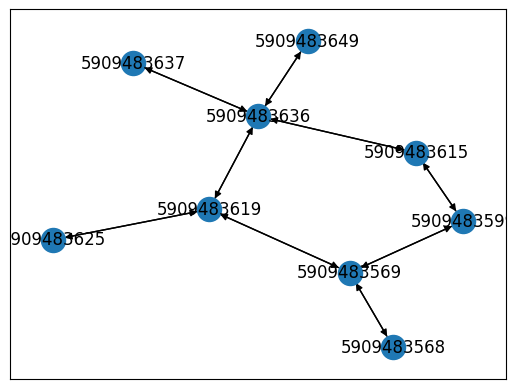

In [6]:
nx.draw_networkx(G)

Let's choose a subgraph

In [7]:
# Fix a seed to get reproducible results
random.seed(42)

# choose a random node
ego_node = random.choice(list(G.nodes))

ego_node

5909483619

In [11]:
subgraph.nodes[ego_node]

{'y': 37.7687054, 'x': -122.2314069, 'street_count': 3}

In [10]:
subgraph = nx.ego_graph(G, ego_node, radius=1)

f"""Subgraph has {subgraph.number_of_nodes()} nodes and {subgraph.number_of_edges()} edges"""

'Subgraph has 4 nodes and 6 edges'

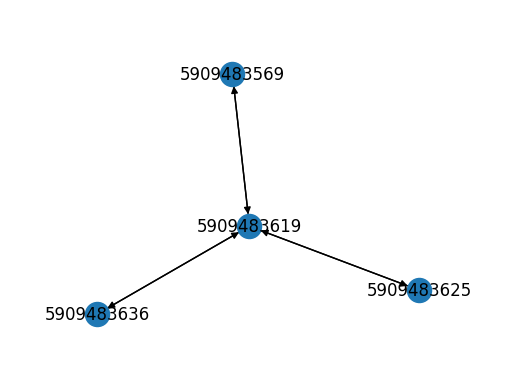

In [12]:
nx.draw_networkx(subgraph)


# Set margins for the axes so nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

This size will do. I'll save it with a reasonable-sounding name

### Save network as a graphml file

In [13]:
filepath = "walk_network_4_nodes_6_edges.graphml"

ox.save_graphml(subgraph, filepath)

### Don't need it? Delete it:

- If you end up using the graph in a test, give it a sensible name
- If you don't end up using the graph, please remove it:

In [14]:
from pathlib import Path

file_path = Path(filepath)
if file_path.exists():
    file_path.unlink()
    print(f"{file_path} has been removed.")
else:
    print(f"{file_path} does not exist.")

walk_network_4_nodes_6_edges.graphml has been removed.


## Adding speed and travel time attributes to edges.
> like it is done in layers.py (get_road_network() method

In [ ]:
# The edges from this subgraph have a length attribute but no speed attribute
# subgraph.edges(data=True)
print(subgraph.edges(data="length"))
# let's add a speed attribute
default_speed_walking = 4
# nx.set_edge_attributes(subgraph, default_speed_walking, "speed_kph")
ox.add_edge_speeds(subgraph, hwy_speeds={"footway": 4, "driving": 50, "bike": 15})
print(subgraph.edges(data="speed_kph"))
# now that it has a speed attribute we can add a travel time attribute
ox.add_edge_travel_times(subgraph)
print(subgraph.edges(data="travel_time"))
time = nx.get_edge_attributes(subgraph, "travel_time")
print(time)
time_min = dict(zip(list(time.keys()), list(map(lambda x: round(x / 60, 2), time.values()))))
print(time_min)
nx.set_edge_attributes(subgraph, time_min, "travel_time")
print(subgraph.edges(data=True))